In [1]:
from JumpGP_code_py.cov.covSum import covSum
from JumpGP_code_py.cov.covSEard import covSEard
from JumpGP_code_py.cov.covNoise import covNoise
from JumpGP_code_py.lik.loglikelihood import loglikelihood
import numpy as np
from scipy.optimize import minimize
from JumpGP_code_py.local_linearfit import local_linearfit
from JumpGP_code_py.calculate_gx import calculate_gx
from JumpGP_code_py.maximize_PD import maximize_PD
from JumpGP_code_py.JumpGP_LD import JumpGP_LD
from JumpGP_code_py.simulate_case import simulate_case

import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from skimage import measure

import numpy as np
from scipy.optimize import minimize
from scipy.linalg import cholesky
from scipy.stats import norm

from JumpGP_code_py.lik.loglikelihood import loglikelihood
from JumpGP_code_py.calculate_gx import calculate_gx
from JumpGP_code_py.cov.covSum import covSum
from JumpGP_code_py.cov.covSEard import covSEard
from JumpGP_code_py.cov.covNoise import covNoise
from JumpGP_code_py.lik.loglikelihood import loglikelihood

In [213]:
import numpy as np

# 随机生成 Training Inputs (x)
n = 100  # 行数
D = 2  # 列数
n_test = 1

x = np.random.randn(n, D)  # 生成 n x D 的随机矩阵
x0 = np.random.randn(n_test, D)

# 随机生成 Target Outputs (y)
y = np.random.randn(n, 1)  # 生成 n 行 1 列的随机列向量

# 随机生成 logtheta
logtheta = np.random.randn(D+2)  # 生成 D+1 维的随机向量
loglike = loglikelihood(logtheta, covSum, [covSEard, covNoise], x, y)
print(f"***loglike:{loglike}")

# 转换为 MATLAB 赋值语句
x_matlab = '\n'.join([' '.join(map(str, row)) for row in x])
y_matlab = '\n'.join(map(str, y.flatten()))
x_test_matlab = '\n'.join([' '.join(map(str, row)) for row in x0])
logtheta_matlab = ';\n'.join(map(str, logtheta))

print("MATLAB 赋值语句：")
print(f"x = [{x_matlab}];")
print(f"y = [{y_matlab}];")
print(f"x0 = [{x_test_matlab}];")
print(f"logtheta = [{logtheta_matlab}];")
print(f"loglike = loglikelihood(logtheta, cv,x,y);")


***loglike:157.07461054653766
MATLAB 赋值语句：
x = [-0.9458078179739379 0.17258741119211987
-0.267046753755074 -0.9525914390762883
-0.5024740143007529 -1.3559412699145832
-0.07364108065616017 -0.2837846762613387
-1.1149663210240894 -0.12405255377351995
-0.15148635423353987 -0.6524193423885227
0.43769027476927586 0.3303966185767653
0.03876819287422665 0.5539165369154384
0.28304582780093673 0.15382323129059522
0.9182411605592122 0.9996016383493174
0.3221687681471232 -0.08409501588955726
1.9972338320018563 -0.5970969721880695
0.14921464796022096 0.027095415300167156
-0.2167515311983906 1.9067361629510526
0.0742253677170507 0.26014054371427553
-1.011354872757268 0.3010586627242674
0.6431207698211011 -1.8929951795638285
-0.21787804324596624 0.019793963071346354
0.730916849901542 1.4703587803834692
-0.5893674745893243 1.5716300282207896
-0.4630550754729389 -1.479915145805595
-0.11781068821575115 -0.40254438582368135
0.5111350326490381 0.6098381248252963
-0.0418344747695164 -0.8501496686078828
1.

Initial boundary visualization


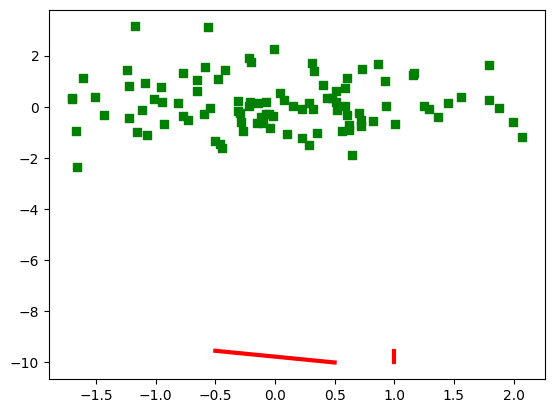

In [228]:
mu_t, sig2_t, model, h = JumpGP_LD(x,y,x0,'CEM',1)

In [229]:
import update_model
import importlib
# import calculate_bias_and_variance
importlib.reload(update_model)
# from calculate_bias_and_variance import calculate_bias_and_variance
from update_model import update_model

In [230]:
new_model = update_model(model, x0)

In [236]:
new_model['gamma']

array([0.95613435, 0.86904697, 0.85826921, 0.90964546, 0.9631354 ,
       0.95288295, 0.96177393, 0.96136952, 0.95370933, 0.96320452,
       0.94840958, 0.96335908, 0.96295423, 0.9584247 , 0.96222365,
       0.94974538, 0.94203309, 0.96123185, 0.95865158, 0.95439003,
       0.92985878, 0.85199012, 0.8187215 , 0.91168753, 0.34977367,
       0.9471637 , 0.96100628, 0.96055204, 0.96366061, 0.93927364,
       0.87727667, 0.96442583, 0.95672477, 0.96102587, 0.8069529 ,
       0.91611598, 0.94652429, 0.80725422, 0.96209751, 0.80847259,
       0.95787049, 0.96069745, 0.96025854, 0.96364414, 0.95275612,
       0.96176228, 0.95902096, 0.96207071, 0.93174092, 0.95846137,
       0.91055207, 0.95632535, 0.95409919, 0.96466648, 0.94512657,
       0.94635235, 0.95952404, 0.95959076, 0.94052703, 0.96303725,
       0.90139616, 0.26368265, 0.9618441 , 0.96193694, 0.96441503,
       0.9624696 , 0.95198395, 0.59420367, 0.37594155, 0.9365862 ,
       0.91626367, 0.90334435, 0.95894367, 0.84652107, 0.96201

In [220]:
D = model['x'].shape[1]
if not (xt.ndim == 2 and xt.shape[1] == D):
    xt = xt.reshape(-1, D)

r1 = model['r'].flatten()

In [222]:
model['cv']

[<function JumpGP_code_py.cov.covSum.covSum(covfunc, logtheta=None, x=None, z=None)>,
 [<function JumpGP_code_py.cov.covSEard.covSEard(loghyper=None, x=None, z=None)>,
  <function JumpGP_code_py.cov.covNoise.covNoise(logtheta=None, x=None, z=None)>]]

In [221]:
K = model['cv'](model['logtheta'], model['x'][r1,:])
_, Kt = model['cv'](model['logtheta'], model['x'][r1,:], xt)

model['x'] = np.vstack([model['x'], xt])

TypeError: 'list' object is not callable

In [215]:
model['x'].shape, model['r'].shape

((100, 2), (100, 1))

In [44]:
import importlib
import calculate_bias_and_variance
importlib.reload(calculate_bias_and_variance)
from calculate_bias_and_variance import calculate_bias_and_variance

In [45]:
bias2, var, bias, parts = calculate_bias_and_variance(model, x0)

In [195]:
import numpy as np

# 随机生成 Training Inputs (x)
n = 100  # 行数
D = 2  # 列数
n_ref = 5

# x = np.random.randn(n, D)  # 生成 n x D 的随机矩阵
xref = np.random.randn(n_ref, D)

x_ref_matlab = '\n'.join([' '.join(map(str, row)) for row in xref])

print("MATLAB 赋值语句：")
print(f"xref = [{x_ref_matlab}];")

MATLAB 赋值语句：
xref = [-0.0731654001781234 -0.4627965932384117
0.6155418673710948 -0.11402798778718107
-0.4939438139142098 -1.6260640852118646
-0.1542930570099412 0.3062339101842189
0.4045031377866247 1.0648775889230913];


In [57]:
cv = model['cv']
cv

[<function JumpGP_code_py.cov.covSum.covSum(covfunc, logtheta=None, x=None, z=None)>,
 [<function JumpGP_code_py.cov.covSEard.covSEard(loghyper=None, x=None, z=None)>,
  <function JumpGP_code_py.cov.covNoise.covNoise(logtheta=None, x=None, z=None)>]]

In [53]:
logtheta = np.array([
    -3.3371,
    -1.5675,
    -0.2285,
    -3.3334
])
logtheta.shape

(4,)

In [55]:
from calcALC import calcALC

In [58]:
ALC = calcALC(x, xref, cv, logtheta)

In [59]:
ALC

array([0.68614094, 0.68614094, 0.68612408, 0.68456894, 0.63346581])

In [66]:
candi = np.random.randn(6, 2)
x_matlab = '\n'.join([' '.join(map(str, row)) for row in candi])
print(f"x = [{x_matlab}];")

x = [1.215081865075019 1.3615970802252244
1.3658806755094446 0.8627701955608172
-0.7661812395053584 0.00858631936735481
-0.2061914032030817 -1.8212464316592387
-0.08131114192693673 -0.6193028005190961
1.0516486348650647 1.371917977525724];


In [68]:
from scipy.spatial.distance import cdist
D = cdist(candi, x)
D.shape

(6, 20)

In [69]:
min_distances = np.min(D, axis=1)
max_min_distance_idx = np.argmax(min_distances)

In [71]:
Xnew = np.vstack([x, candi[max_min_distance_idx]])

In [72]:
Xnew.shape

(21, 2)

In [62]:
from maxmin_design import maxmin_design

In [63]:
X1 = maxmin_design(20, 2, x)

In [64]:
X1

array([[ 0.31394843, -1.67120836],
       [-0.21634555, -0.95751768],
       [-1.9628843 , -0.51466743],
       [-0.18041158,  0.90753096],
       [-0.46447979,  0.40555335],
       [-0.65453261, -0.37499752],
       [-0.20246965,  1.00020513],
       [ 0.19943768,  0.16118017],
       [ 0.09867131,  0.08590063],
       [ 0.41898232,  0.25947682],
       [ 0.18326787,  0.74773203],
       [ 0.15299701, -0.44797054],
       [ 0.34783183,  1.3689971 ],
       [-0.39458575, -1.28828182],
       [ 1.42746665, -0.05201671],
       [-0.41015714,  1.19018676],
       [-1.38231985, -0.83929468],
       [ 0.64610819, -0.40708451],
       [ 0.8233015 ,  0.07472668],
       [-1.24910365, -0.21904738]])

In [73]:
y.shape

(20, 1)

In [202]:
import ActiveJGP
import importlib
import JumpGP_code_py.JumpGP_LD
# import calculate_bias_and_variance
importlib.reload(ActiveJGP)
importlib.reload(JumpGP_code_py.JumpGP_LD)
from JumpGP_code_py.JumpGP_LD import JumpGP_LD
from ActiveJGP import ActiveJGP

In [203]:
x.shape, y.shape, xref.shape

((100, 2), (100, 1), (5, 2))

In [204]:
xt_next, criteria, bias2_changes, var_changes, pred, pred_xt, pred_var, pred_bias = ActiveJGP(x,y,xref,'MIN_IMSPE')

In [205]:
xt_next, criteria, bias2_changes, var_changes, pred, pred_xt, pred_var, pred_bias

(array([-0.49394381, -1.62606409]),
 array([ 0.00528064,  0.00379319,  0.25319073, -0.09259935,  0.00708817]),
 array([ 0.        ,  0.        , -0.06190982,  0.        ,  0.        ]),
 array([ 0.00528064,  0.00379319,  0.31510055, -0.09259935,  0.00708817]),
 array([-0.52921907, -0.92464721, -0.1213531 , -0.34402694,  0.06791659]),
 np.float64(-0.12135309912170211),
 array([0.44513186, 0.3032468 , 0.31510144, 0.62118294, 0.30190198]),
 array([-0.       , -0.       ,  0.3047767, -0.       , -0.       ]))

In [104]:
x, y, xt, mode = x,y,xref,'CEM'

In [105]:
N, D = x.shape
if y.shape[0] != N:
    raise ValueError("Row sizes of x and y should be the same!")
if xt.shape[1] != D:
    raise ValueError("Column size of x should match column size of xt!")

# Handling optional arguments
k = 15

M = xt.shape[0]
bias2_changes = np.zeros(M)
var_changes = np.zeros(M)
pred = np.zeros(M)
pred_var = np.zeros(M)
pred_bias = np.zeros(M)
bias2 = np.zeros(M)
var = np.zeros(M)

In [106]:
nbrs = NearestNeighbors(n_neighbors=k).fit(x)
idx = nbrs.kneighbors(xt, return_distance=False)

models = [None] * M

In [183]:
nbrs = NearestNeighbors(n_neighbors=15).fit(x)

In [184]:
idx = nbrs.kneighbors(xt, return_distance=False)
idx

array([[ 5, 19, 16,  1, 13,  2,  4, 11,  8,  7,  9,  3, 17,  6, 10],
       [ 5, 16, 19,  1, 13, 11,  2,  4,  8,  7,  0, 17,  9,  3, 10],
       [19,  2, 16,  5,  4,  3, 15,  8,  6,  1,  7, 11, 13, 10,  9],
       [ 1, 13,  5, 11, 16, 19,  8,  0, 17,  7,  4,  9, 18,  2, 10],
       [ 5, 19,  1,  4, 11,  8, 16,  7, 13,  9, 17,  3, 10,  2,  6]])

In [185]:
m = 2
xt_j = xt[m, :].reshape(-1, D)
x_j = x[idx[m, :], :]
y_j = y[idx[m, :]]

try:
    if len(args) > 0 and args[0] is not None:
        pred[m], _, tmp_model, _ = JumpGP_LD(x_j, y_j, xt_j, 'CEM', 0, args[0]) # output: mu_t, sig2_t, model, h
        bias2[m], var[m], pred_bias[m], _ = calculate_bias_and_variance(tmp_model, xt_j, args[0]) # bias2.item(), var.item(), bias.item(), parts.reshape(-1,1)
    else:
        pred[m], _, tmp_model, _ = JumpGP_LD(x_j, y_j, xt_j, 'CEM', 0)
        bias2[m], var[m], pred_bias[m], _ = calculate_bias_and_variance(tmp_model, xt_j)
    pred_var[m] = var[m]
except Exception as ex:
    pred[m] = np.nan
    print('Error!',ex)

if mode == 'MAX_MSPE':
    bias2_changes[m] = bias2[m]
    var_changes[m] = var[m]

if mode in ['MIN_IMSPE', 'MIN_ALC']:
    models[m] = tmp_model

if mode == 'MAX_VAR':
    bias2_changes[m] = 0
    var_changes[m] = var[m]

C:\Users\yxu59\AppData\Local\Temp\ipykernel_21928\3897584099.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pred[m], _, tmp_model, _ = JumpGP_LD(x_j, y_j, xt_j, 'CEM', 0)


In [186]:
pred

array([0.        , 0.        , 0.47732428, 0.        , 0.        ])

In [91]:
m = 0
xt_j = xt[m, :].reshape(-1, D)
x_j = x[idx[m, :], :]
y_j = y[idx[m, :], :]

In [92]:
pred[m], _, tmp_model, _ = JumpGP_LD(x_j, y_j, xt_j, 'CEM', 0)

C:\Users\yxu59\AppData\Local\Temp\ipykernel_21928\1695829151.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pred[m], _, tmp_model, _ = JumpGP_LD(x_j, y_j, xt_j, 'CEM', 0)


In [94]:
bias2[m], var[m], pred_bias[m], _ = calculate_bias_and_variance(tmp_model, xt_j)

In [93]:
xt_j.shape, x_j.shape, y_j.shape

((1, 2), (15, 2), (15, 1))

In [90]:
xt.shape

(5, 2)

In [112]:
m = 0
x_candidate = xt[m, :]
y_candidate = pred[m]
x_new = np.vstack((x, x_candidate))
y_new = np.append(y, y_candidate).reshape(-1,1)

In [113]:
y_candidate.shape, y_new.shape, x_new.shape

((), (21, 1), (21, 2))

In [120]:
nbrs_new = NearestNeighbors(n_neighbors=k).fit(x_new)
idxm = nbrs_new.kneighbors(xt, return_distance=False)

bias2_changes[m] = 0
var_changes[m] = 0

affected_test_locs = np.where((idxm == N).sum(axis=1) > 0)[0]

In [127]:
affected_test_locs

array([0, 1, 2, 3, 4])

In [123]:
mode = 'MIN_IMSPE'
for j in affected_test_locs:
    xt_j = xt[j, :].reshape(-1, D)
    x_j = x_new[idxm[j, :], :]
    y_j = y_new[idxm[j, :], :]

    cur_bias2 = bias2[j]
    cur_var = var[j]

    if len(args) > 0 and args[0] is not None:
        _, _, tmp_model, _ = JumpGP_LD(x_j, y_j, xt_j, 'CEM', 0, args[0])
        new_bias2, new_var, _, _ = calculate_bias_and_variance(tmp_model, xt_j, args[0])
    else:
        _, _, tmp_model, _ = JumpGP_LD(x_j, y_j, xt_j, 'CEM', 0)
        new_bias2, new_var, _, _ = calculate_bias_and_variance(tmp_model, xt_j)

    if mode == 'MIN_IMSPE':
        bias2_changes[m] += cur_bias2 - new_bias2
    var_changes[m] += cur_var - new_var

C:\Users\yxu59\autumn2024\codeBase\code_al_jgp_py\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\code_al_jgp_py\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\code_al_jgp_py\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\code_al_jgp_py\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autum

In [122]:
x_j.shape, y_j.shape, xt_j.shape

((15, 2), (15, 1), (2,))

In [164]:
x, y, xt, mode = x,y,xref,'CEM'
N, D = x.shape
if y.shape[0] != N:
    raise ValueError("Row sizes of x and y should be the same!")
if xt.shape[1] != D:
    raise ValueError("Column size of x should match column size of xt!")

# Handling optional arguments
k = args[1] if len(args) > 1 else min(15, round(N * 0.2))

M = xt.shape[0]
bias2_changes = np.zeros(M)
var_changes = np.zeros(M)
pred = np.zeros(M)
pred_var = np.zeros(M)
pred_bias = np.zeros(M)
bias2 = np.zeros(M)
var = np.zeros(M)

# Nearest neighbors
nbrs = NearestNeighbors(n_neighbors=k).fit(x)
idx = nbrs.kneighbors(xt, return_distance=False)

models = [None] * M

In [165]:
m = 2
xt_j = xt[m, :].reshape(-1, D)
x_j = x[idx[m, :], :]
y_j = y[idx[m, :]]

# try:
#     if len(args) > 0 and args[0] is not None:
#         pred[m], _, tmp_model, _ = JumpGP_LD(x_j, y_j, xt_j, 'CEM', 0, args[0]) # output: mu_t, sig2_t, model, h
#         bias2[m], var[m], pred_bias[m], _ = calculate_bias_and_variance(tmp_model, xt_j, args[0]) # bias2.item(), var.item(), bias.item(), parts.reshape(-1,1)
#     else:
#         pred[m], _, tmp_model, _ = JumpGP_LD(x_j, y_j, xt_j, 'CEM', 0)
#         if pred[m]==np.nan:
#             print(f"xj is {x_j}, yj is {y_j}, xtj is {xt_j}")
#         bias2[m], var[m], pred_bias[m], _ = calculate_bias_and_variance(tmp_model, xt_j)
#     pred_var[m] = var[m]
# except Exception as ex:
#     print('ERROR with pred nan!:',ex)
#     print(f"x is {x_j}, y is {y_j}, xt is {xt_j}")
#     pred[m] = np.nan

In [179]:
import ActiveJGP
import importlib
import JumpGP_code_py.JumpGP_LD
# import calculate_bias_and_variance
importlib.reload(ActiveJGP)
importlib.reload(JumpGP_code_py.JumpGP_LD)
from JumpGP_code_py.JumpGP_LD import JumpGP_LD
from ActiveJGP import ActiveJGP

In [180]:
# pred[m], _, tmp_model, _ = JumpGP_LD(x_j, y_j, xt_j, 'CEM', 0)
result = JumpGP_LD(x_j, y_j, xt_j, 'CEM', 0, debug=True)

# 假设 result 返回 (array, _, model, _)，其中 array 是单值数组
pred[m] = result[0].item()  # 提取单个元素
_, tmp_model, _ = result[1:]

===== Variable Values =====
x:
[[-1.24910365 -0.21904738]
 [-1.9628843  -0.51466743]
 [-1.38231985 -0.83929468]
 [-0.65453261 -0.37499752]]

y:
[[ 0.86662341]
 [ 0.10482995]
 [ 0.22962605]
 [-0.19049319]]

xt:
[[-1.49636334  0.06123541]]

px:
[[-1.24910365 -0.21904738]
 [-1.9628843  -0.51466743]
 [-1.38231985 -0.83929468]
 [-0.65453261 -0.37499752]]

pxt:
[[-1.49636334  0.06123541]]

w:
[[-0.10679169]
 [-0.26786012]
 [ 0.99288109]]

logtheta:
[ 0.    0.    0.   -1.15]

cv:
[<function covSum at 0x000002C72F0C34C0>, [<function covSEard at 0x000002C75D8B09A0>, <function covNoise at 0x000002C75D8B0CC0>]]

bVerbose:
0



In [176]:
result

(array([[nan]]),
 array([[7.7134774e-14]]),
 {'x': array([[-1.24910365, -0.21904738],
         [-1.9628843 , -0.51466743],
         [-1.38231985, -0.83929468],
         [-0.65453261, -0.37499752]]),
  'y': array([[ 0.86662341],
         [ 0.10482995],
         [ 0.22962605],
         [-0.19049319]]),
  'RR': np.float64(nan),
  'fs': array([[nan]]),
  'sigma': np.float64(nan),
  'xt': array([[-1.49636334,  0.06123541]]),
  'px': array([[-1.24910365, -0.21904738],
         [-1.9628843 , -0.51466743],
         [-1.38231985, -0.83929468],
         [-0.65453261, -0.37499752]]),
  'pxt': array([[-1.49636334,  0.06123541]]),
  'nll': np.float64(nan),
  'r': array([[False],
         [False],
         [False],
         [False]]),
  'gamma': array([[nan],
         [nan],
         [nan],
         [nan]]),
  'nw': np.float64(46.53877975750565),
  'w': array([-0.22057218, -0.10773481,  0.96940246]),
  'ms': nan,
  'logtheta': array([  0.        ,   0.        , -23.38865227, -15.09661113]),
  'cv': 

In [170]:
x_j, y_j, xt_j

(array([[-1.24910365, -0.21904738],
        [-1.9628843 , -0.51466743],
        [-1.38231985, -0.83929468],
        [-0.65453261, -0.37499752]]),
 array([[ 0.86662341],
        [ 0.10482995],
        [ 0.22962605],
        [-0.19049319]]),
 array([[-1.49636334,  0.06123541]]))

In [172]:
result

(array([[nan]]),
 array([[7.7134774e-14]]),
 {'x': array([[-1.24910365, -0.21904738],
         [-1.9628843 , -0.51466743],
         [-1.38231985, -0.83929468],
         [-0.65453261, -0.37499752]]),
  'y': array([[ 0.86662341],
         [ 0.10482995],
         [ 0.22962605],
         [-0.19049319]]),
  'RR': np.float64(nan),
  'fs': array([[nan]]),
  'sigma': np.float64(nan),
  'xt': array([[-1.49636334,  0.06123541]]),
  'px': array([[-1.24910365, -0.21904738],
         [-1.9628843 , -0.51466743],
         [-1.38231985, -0.83929468],
         [-0.65453261, -0.37499752]]),
  'pxt': array([[-1.49636334,  0.06123541]]),
  'nll': np.float64(nan),
  'r': array([[False],
         [False],
         [False],
         [False]]),
  'gamma': array([[nan],
         [nan],
         [nan],
         [nan]]),
  'nw': np.float64(46.53877975750565),
  'w': array([-0.22057218, -0.10773481,  0.96940246]),
  'ms': nan,
  'logtheta': array([  0.        ,   0.        , -23.38865227, -15.09661113]),
  'cv': 

In [237]:
from simulate_case_d_linear import simulate_case_d_linear

In [238]:
d, sig, N, Nt, Nc = 3, 2, 100, 5, 20
x, y, xc, yc, xt, yt, func, logtheta, cv = simulate_case_d_linear(d, sig, N, Nt, Nc)

In [240]:
x.shape, y.shape, xc.shape, yc.shape, xt.shape, yt.shape, func, logtheta

((100, 3),
 (100,),
 (20, 3),
 (20,),
 (5, 3),
 (5,),
 <function simulate_case_d_linear.simulate_case_d_linear.<locals>.<lambda>(x)>,
 array([-1.89711998, -1.89711998, -1.89711998,  1.09861229,  0.69314718]))

In [276]:
import standardGP
import JumpGP_code_py.lik.loglikelihood
import importlib
importlib.reload(standardGP)
importlib.reload(JumpGP_code_py.lik.loglikelihood)
from standardGP import standardGP
from JumpGP_code_py.lik.loglikelihood import loglikelihood

In [277]:
x.shape, y.shape, xt.shape

((100, 3), (100,), (5, 3))

In [278]:
mu_t, sig2_t, model = standardGP(x,y,xt,nIter=100)

In [279]:
mu_t, sig2_t

(array([[ 7.99806325],
        [-6.65231069],
        [-5.23680392],
        [-1.67292904],
        [ 7.20136077]]),
 array([[17.35758075, 17.08986528, 16.88409335, 17.64903713, 16.51664046],
        [17.35758075, 17.08986528, 16.88409335, 17.64903713, 16.51664046],
        [17.35758075, 17.08986528, 16.88409335, 17.64903713, 16.51664046],
        [17.35758075, 17.08986528, 16.88409335, 17.64903713, 16.51664046],
        [17.35758075, 17.08986528, 16.88409335, 17.64903713, 16.51664046]]))

In [271]:
model

{'covfunc': [<function JumpGP_code_py.cov.covSum.covSum(covfunc, logtheta=None, x=None, z=None)>,
  [<function JumpGP_code_py.cov.covSEard.covSEard(loghyper=None, x=None, z=None)>,
   <function JumpGP_code_py.cov.covNoise.covNoise(logtheta=None, x=None, z=None)>]],
 'logtheta': array([-1.61859736,  0.66854457,  1.49771829, 12.10326818, -0.87320293]),
 'x': array([[-0.4876179 , -0.10484962, -0.22531342],
        [ 0.48382498,  0.09863222,  0.41995504],
        [ 0.44724893, -0.35127805, -0.37936494],
        [ 0.2486444 ,  0.4918681 , -0.43415995],
        [-0.2606009 ,  0.41941379,  0.41693611],
        [-0.29070886, -0.39460339,  0.49366618],
        [-0.28930654,  0.46756832, -0.15644854],
        [ 0.27003483, -0.42491665,  0.23072369],
        [-0.03485088,  0.01834227,  0.11432017],
        [ 0.42947136,  0.06857961, -0.05192762],
        [-0.09735538, -0.28090239, -0.4983266 ],
        [-0.48928704,  0.01026016,  0.28947269],
        [ 0.26345095,  0.46243409,  0.21580233],
     

In [272]:
x_matlab = '\n'.join([' '.join(map(str, row)) for row in x])
y_matlab = '\n'.join(map(str, y.flatten()))
xt_matlab = '\n'.join([' '.join(map(str, row)) for row in xt])
logtheta_matlab = ';\n'.join(map(str, logtheta))

print("MATLAB 赋值语句：")
print(f"x = [{x_matlab}];")
print(f"y = [{y_matlab}];")
print(f"xt = [{xt_matlab}];")
print(f"logtheta = [{logtheta_matlab}];")
print(f"loglike = loglikelihood(logtheta, cv,x,y);")

MATLAB 赋值语句：
x = [-0.4876179048323894 -0.10484961580540397 -0.22531342178608138
0.48382498442459154 0.09863221825965984 0.4199550359260418
0.44724893321715997 -0.3512780472006173 -0.37936493728842147
0.2486444024201243 0.4918680950579336 -0.4341599460748732
-0.2606008964954998 0.41941379359859166 0.41693610864623964
-0.29070886279661057 -0.39460339091378227 0.4936661848294418
-0.2893065350103696 0.4675683241246038 -0.15644854051502755
0.270034826018133 -0.42491665138524626 0.23072368832627999
-0.034850882991657395 0.018342272204458276 0.1143201724583286
0.42947136392735263 0.0685796113794166 -0.0519276222616708
-0.09735537872647815 -0.2809023903270589 -0.49832659778116295
-0.48928703837249443 0.010260155042982388 0.28947269276358223
0.2634509457082297 0.4624340880501927 0.21580232967930824
0.14288059993123448 0.05871712404507268 -0.4491005808824797
-0.06547288550823593 -0.4536434613010861 -0.0955745453589183
0.05464566998381171 0.1689078823429475 0.49782252805787697
-0.4051472936449414

In [280]:
cv = [covSum, [covSEard, covNoise]]
d = x.shape[1]
logtheta0 = np.zeros(d + 2)
logtheta0[-1] = 1  # clean data for ground truth

# Optimize logtheta if not provided
if logtheta is None:
    logtheta = minimize(loglikelihood, logtheta0, args=(cv[0], cv[1], x, y), options={'maxiter': nIter}).x
    # logtheta = minimize(logtheta0, loglikelihood, nIter, cv, x, y)

# Define the GP model parameters
model = {
    'covfunc': cv,
    'logtheta': logtheta,
    'x': x,
    'y': y,
    'xt': xt
}

# Calculate covariance matrices
K = cv[0](cv[1], logtheta, x)
Ktt, Kt = cv[0](cv[1], logtheta, x, xt)

In [281]:
L = cholesky(K, lower=True)

In [286]:
Ly = np.linalg.solve(L, y).reshape(-1,1)

In [287]:
LK = np.linalg.solve(L, Kt)

In [288]:
L.shape, Ly.shape, LK.shape

((100, 100), (100, 1), (100, 5))

In [293]:
mu_t = LK.T @ Ly
sig2_t = Ktt - np.sum(LK ** 2, axis=0).reshape(-1,1)

In [294]:
sig2_t

array([[9.27522462],
       [7.32762516],
       [7.85556918],
       [7.19662513],
       [9.11166566]])

In [292]:
np.sum(LK ** 2, axis=0).shape

(5,)

In [296]:
rmse = np.random.rand(100, 7)
rmse_matlab = '\n'.join([' '.join(map(str, row)) for row in rmse])
print(f"rmse = [{rmse_matlab}];")

rmse = [0.6054660367847665 0.09156424508373628 0.5241898262944569 0.8348221457517058 0.24006139731776788 0.4078762669573427 0.10882409167253693
0.12987645183711394 0.8205676704847386 0.40430605069572534 0.2375575173821306 0.5707771306040951 0.7324387889144564 0.21310435418197315
0.3822327661944719 0.4087255395547873 0.7208545645136718 0.6499823482566531 0.058764039473866325 0.14753397374328914 0.24493826251519513
0.5431893669798512 0.3647376996127707 0.4664194877180676 0.9158839204064515 0.11546016176114371 0.5797328626892934 0.7676701872687024
0.39772354871446236 0.37515304983723163 0.9008133471135209 0.15719144943438357 0.12688531082295573 0.3077727793498074 0.3803524115947783
0.4087755025704679 0.36025280790183434 0.7451829540235582 0.04124188511216009 0.8765569205285189 0.10272205281150959 0.9499255277860489
0.9939391745356034 0.3901486436301166 0.4813523534688948 0.7498839100668004 0.6435954299306653 0.7551104407279795 0.24139808811612584
0.35996796093947714 0.6221192029043746 0.0

In [297]:
from plotResults import plotResults

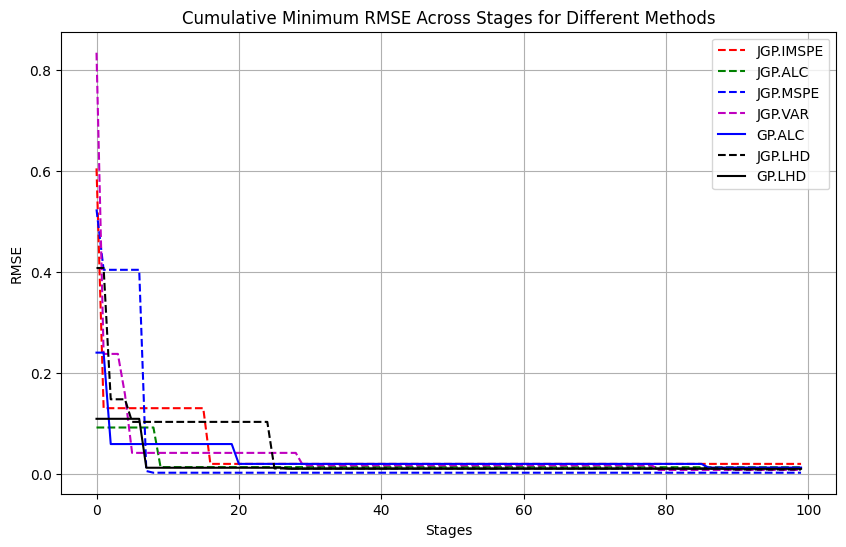

In [298]:
plotResults(rmse)

In [436]:
import ActiveJGP
import run_main_simulation
import importlib
importlib.reload(run_main_simulation)
importlib.reload(ActiveJGP)
from ActiveJGP import ActiveJGP
from JumpGP_code_py.JumpGP_LD import JumpGP_LD

C:\Users\yxu59\autumn2024\codeBase\code_al_jgp_py\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\code_al_jgp_py\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\code_al_jgp_py\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\code_al_jgp_py\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autum

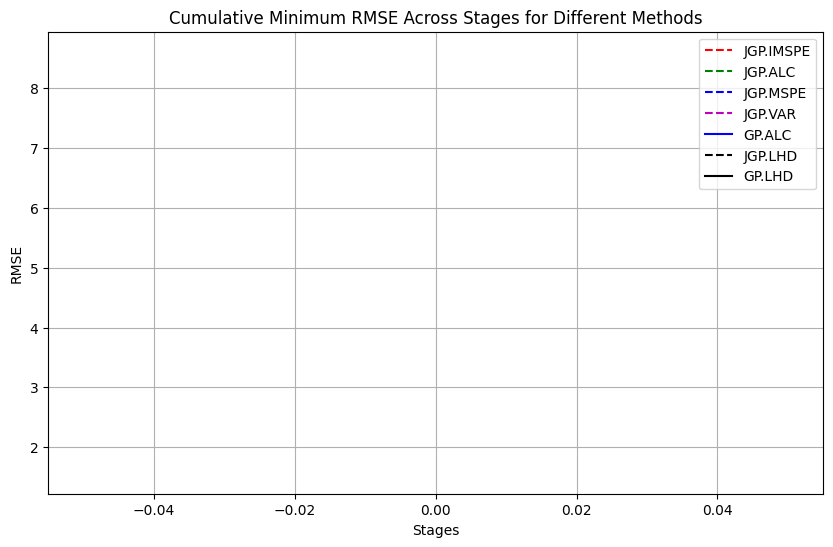

C:\Users\yxu59\autumn2024\codeBase\code_al_jgp_py\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\code_al_jgp_py\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\code_al_jgp_py\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\code_al_jgp_py\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autum

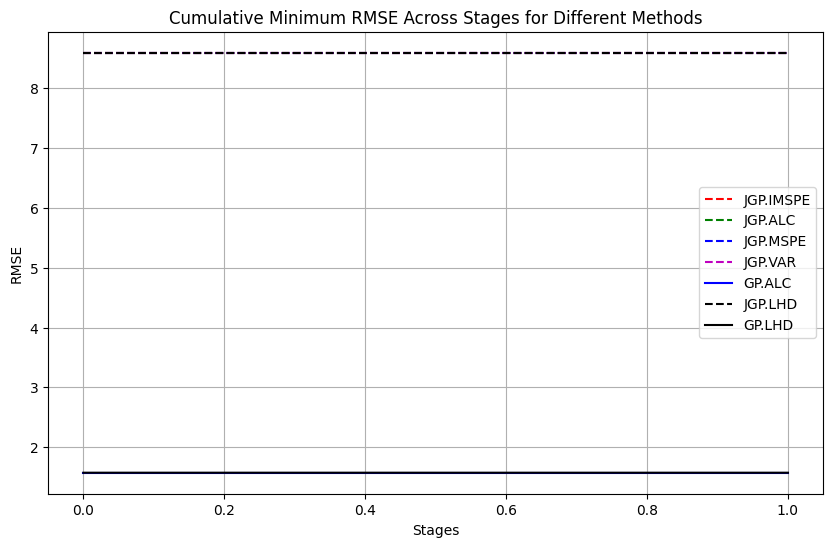

C:\Users\yxu59\autumn2024\codeBase\code_al_jgp_py\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\code_al_jgp_py\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\code_al_jgp_py\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\code_al_jgp_py\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autum

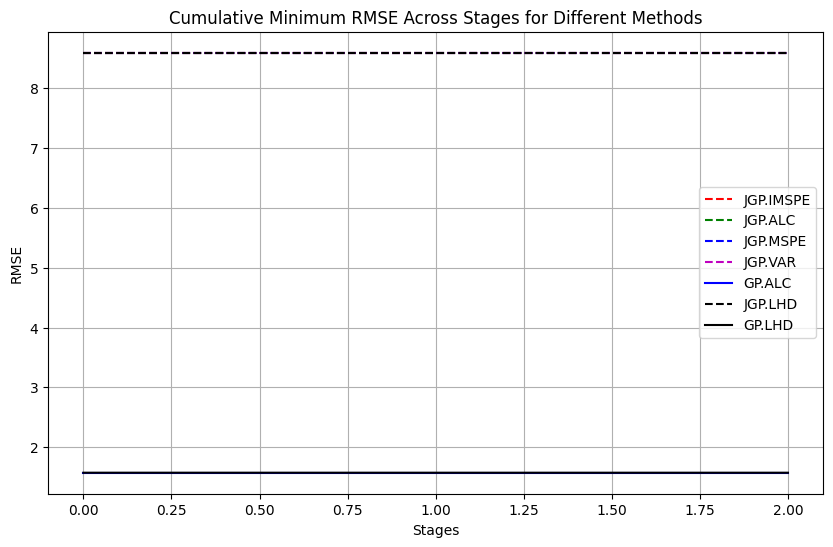

C:\Users\yxu59\autumn2024\codeBase\code_al_jgp_py\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\code_al_jgp_py\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\code_al_jgp_py\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: divide by zero encountered in log
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\autumn2024\codeBase\code_al_jgp_py\JumpGP_code_py\maximize_PD.py:80: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(r.T * np.log(1 / (1 + np.exp(-phi_w))) + (1 - r).T * np.log(1 - 1 / (1 + np.exp(-phi_w))) )
C:\Users\yxu59\AppDa

x is [[-0.80603296 -0.11735679]
 [-0.49401588 -0.14354081]
 [-0.4990743  -0.04054672]
 [-0.44326674 -0.25631195]
 [-0.86222333 -0.5017764 ]
 [-0.44856466  0.04001447]
 [-0.49229671 -0.3618133 ]
 [-0.39602364 -0.15854675]
 [-0.46269055  0.12127594]
 [-0.49511069  0.19403284]
 [-0.35391012 -0.08435442]
 [-0.36222333 -0.0017764 ]], y is [[         nan]
 [ -3.22037342]
 [ -2.25328274]
 [-11.53055318]
 [  4.99805534]
 [ -4.90006438]
 [-10.9595556 ]
 [-10.58315195]
 [ -3.13223986]
 [ -7.71223531]
 [ -4.09048773]
 [ -6.27912271]], xt is [[-0.80603296 -0.11735679]]
Error with JumpGP_LD, w is [[nan]
 [nan]
 [nan]]


UnboundLocalError: cannot access local variable 'b' where it is not associated with a value

In [4]:
d, N, Nt, Nc, S, outputfile = 2, 100, 10, 20, 5, 'C:\\Users\\yxu59\\autumn2024\\codeBase\\code_al_jgp_py\\results\\main_simulation'
from run_main_simulation import run_main_simulation
pred, pred_var,mse, rmse, nlpd, x_AL, y_AL, xt, yt, xc, yc = run_main_simulation(d, N, Nt, Nc, S, outputfile)

In [5]:
rmse

array([[6.55015773, 6.55015773, 6.55015773, 6.55015773, 3.0455961 ,
        6.55015773, 3.0455961 ],
       [6.55015773, 6.55015773, 6.55015773, 6.55015773, 3.04559519,
        6.55015773, 3.04553444],
       [6.55015773, 6.55015773, 6.55015773, 6.55015773, 3.04550855,
        6.55015773, 3.04596224],
       [6.55015773, 6.55015773, 6.55015773, 6.55015773, 3.04544697,
        6.55015773, 3.04609027],
       [6.55015773, 6.55015773, 6.55015773, 6.55015773, 3.04492986,
        6.55015773, 3.04608944]])

In [426]:
rmse

{(0, 0): np.float64(9.18508992700019)}

In [392]:
sig = 2
x, y, xc, yc, xt, yt, decfunc, logtheta, cv = simulate_case_d_linear(d, sig, N, Nt, Nc)
methods = ['MIN_IMSPE', 'MIN_ALC', 'MAX_MSPE', 'MAX_VAR', 'GP_ALC', 'JGP_LHD', 'GP_LHD']

x_AL = {k: x.copy() for k in range(len(methods))}
y_AL = {k: y.copy() for k in range(len(methods))}
step = 0.005

pred, pred_var, mse, rmse, nlpd = {}, {}, {}, {}, {}

In [393]:
s = 0
k = 0
method = methods[k]

In [394]:
y = y.reshape(-1, 1)
yc = yc.reshape(-1, 1)
yt = yt.reshape(-1, 1)

In [395]:
xc_ind = random.sample(range(xc.shape[0]), round(xc.shape[0] * 0.2))
xc_s = xc[xc_ind, :]
yc_s = yc[xc_ind, :]

In [396]:
mode

'MIN_IMSPE'

In [397]:
if k in [0, 1, 2, 3]:
    if k in [0, 2]:  # MIN_IMSPE or MAX_MSPE
        _, criteria, _, var_changes, *_ = ActiveJGP(x_AL[k], y_AL[k], xc_s, method, logtheta,
                                                min(12, max(8, round((N + s) / 4))))
    else:
        criteria = var_changes
elif k == 4:  # ALC with GP
    criteria = calcALC(x_AL[k], xc_s, cv, logtheta)
elif k in [5, 6]:  # LHD
    dist = pdist2(xc_s, x_AL[k])
    criteria = np.min(dist, axis=1)

we fail at iteration 1


In [400]:
if k in [0, 1, 2, 3, 5]:
    _, _, _, _, pred_value, _, pred_var_value, _ = ActiveJGP(x_AL[k], y_AL[k], xt, 'MAX_MSPE', logtheta,
                                                      min(12, max(8, round((N + s) / 4))))
else:
    pred_value, pred_var_value, _ = standardGP(x_AL[k], y_AL[k], xt, logtheta)

pred[(s, k)] = pred_value
pred_var[(s, k)] = pred_var_value

In [402]:
from scipy.spatial.distance import cdist

In [417]:
ia = np.where(np.min(cdist(xc_s, x_AL[k], metric='euclidean'), axis=1) > step)[0]
ib = np.argmax(criteria[ia])
x_next = xc_s[ia[ib], :]

x_AL[k] = np.vstack([x_AL[k], x_next])
y_AL[k] = np.vstack([y_AL[k].reshape(-1,1), yc_s[ia[ib], :].reshape(-1,1)])

# Calculate errors and metrics
diff = pred_value - yt
v = pred_var_value
mse[(s, k)] = np.mean(diff ** 2)
rmse[(s, k)] = np.mean(np.abs(diff))
nlpd[(s, k)] = 0.5 * np.mean(diff ** 2 / v + np.log(2 * np.pi * v))

In [420]:
outputfile = 'C:\\Users\\yxu59\\autumn2024\\codeBase\\code_al_jgp_py\\results'

'C:\\Users\\yxu59\\autumn2024\\codeBase\\code_al_jgp_py\\results'

In [423]:
rmse

{(0, 0): np.float64(9.18508992700019)}

In [422]:
plotResults(rmse)

KeyError: (slice(None, None, None), 0)

<Figure size 1000x600 with 0 Axes>

In [421]:
np.savez(outputfile, pred=pred, pred_var=pred_var, mse=mse, rmse=rmse, nlpd=nlpd,x_AL=x_AL, y_AL=y_AL, xt=xt, yt=yt, xc=xc, yc=yc)

In [415]:
y_AL[k] = np.vstack([y_AL[k].reshape(-1,1), yc_s[ia[ib], :].reshape(-1,1)])

In [379]:
tmp_model

{'x': array([[-0.36202698, -0.28780797, -0.46017653, -0.4787751 ,  0.2177948 ],
        [-0.38157006, -0.44549674, -0.32748813, -0.40664411, -0.46617303],
        [ 0.02216894, -0.42526568, -0.39512618, -0.45029893,  0.41563072],
        [-0.38118212, -0.27592786, -0.38955648, -0.06237978,  0.06245902],
        [-0.05887238, -0.05339368, -0.24532458, -0.47056054,  0.0789743 ],
        [-0.12786398, -0.05176572, -0.33865699, -0.37747238, -0.39290585],
        [-0.36439191, -0.43120341, -0.01473265, -0.1733269 ,  0.20201823],
        [ 0.49414783, -0.38933111, -0.47078474, -0.42971663, -0.30533007],
        [-0.06744268, -0.41288915,  0.11538259, -0.4927733 ,  0.24656652],
        [ 0.2216567 , -0.37749023, -0.23313457, -0.24574497,  0.14857518],
        [-0.46709672, -0.44261988,  0.15581867, -0.33311049, -0.34891519],
        [ 0.09212696, -0.41622992, -0.04555947, -0.26899025, -0.39930109]]),
 'y': array([[ 8.948667  ],
        [11.66073713],
        [ 4.03428595],
        [ 4.4562392

In [305]:
import numpy as np
import random

from simulate_case_d_linear import simulate_case_d_linear
from ActiveJGP import ActiveJGP
from plotResults import plotResults
from calcALC import calcALC
from standardGP import standardGP

In [452]:
import ActiveJGP
import JumpGP_code_py.JumpGP_LD
import importlib
importlib.reload(JumpGP_code_py.JumpGP_LD)
importlib.reload(ActiveJGP)
from ActiveJGP import ActiveJGP
from JumpGP_code_py.JumpGP_LD import JumpGP_LD

In [380]:
k

0

In [381]:
ActiveJGP(x_AL[k], y_AL[k], xc_s, method, logtheta,min(12, max(8, round((N + s) / 4))))

ERROR with pred nan!: boolean index did not match indexed array along axis 0; size of axis is 12 but size of corresponding boolean axis is 144
x is [[-0.36202698 -0.28780797 -0.46017653 -0.4787751   0.2177948 ]
 [-0.38157006 -0.44549674 -0.32748813 -0.40664411 -0.46617303]
 [ 0.02216894 -0.42526568 -0.39512618 -0.45029893  0.41563072]
 [-0.38118212 -0.27592786 -0.38955648 -0.06237978  0.06245902]
 [-0.05887238 -0.05339368 -0.24532458 -0.47056054  0.0789743 ]
 [-0.12786398 -0.05176572 -0.33865699 -0.37747238 -0.39290585]
 [-0.36439191 -0.43120341 -0.01473265 -0.1733269   0.20201823]
 [ 0.49414783 -0.38933111 -0.47078474 -0.42971663 -0.30533007]
 [-0.06744268 -0.41288915  0.11538259 -0.4927733   0.24656652]
 [ 0.2216567  -0.37749023 -0.23313457 -0.24574497  0.14857518]
 [-0.46709672 -0.44261988  0.15581867 -0.33311049 -0.34891519]
 [ 0.09212696 -0.41622992 -0.04555947 -0.26899025 -0.39930109]], y is [ 8.948667   11.66073713  4.03428595  4.45623922  2.71057532  7.87126619
  7.6514167   6.

UnboundLocalError: cannot access local variable 'tmp_model' where it is not associated with a value

In [382]:
k = 0

In [383]:
x, y, xt, mode, *args = x_AL[k], y_AL[k], xc_s, method, logtheta, min(12, max(8, round((N + s) / 4)))

In [384]:
y = y.reshape(-1,1)

In [385]:
N, D = x.shape
if y.shape[0] != N:
    raise ValueError("Row sizes of x and y should be the same!")
if xt.shape[1] != D:
    raise ValueError("Column size of x should match column size of xt!")

# Handling optional arguments
k = args[1] if len(args) > 1 else min(15, round(N * 0.2))

M = xt.shape[0]
bias2_changes = np.zeros(M)
var_changes = np.zeros(M)
pred = np.zeros(M)
pred_var = np.zeros(M)
pred_bias = np.zeros(M)
bias2 = np.zeros(M)
var = np.zeros(M)

# Nearest neighbors
nbrs = NearestNeighbors(n_neighbors=k).fit(x)
idx = nbrs.kneighbors(xt, return_distance=False)

models = [None] * M

In [386]:
m = 0

In [387]:
xt_j = xt[m, :].reshape(-1, D)
x_j = x[idx[m, :], :]
y_j = y[idx[m, :]]

In [388]:
xt_j.shape, x_j.shape, y_j.shape

((1, 5), (12, 5), (12, 1))

In [389]:
if len(args) > 0 and args[0] is not None:
    pred[m], _, tmp_model, _ = JumpGP_LD(x_j, y_j, xt_j, 'CEM', 0, args[0], debug=True) # output: mu_t, sig2_t, model, h
    bias2[m], var[m], pred_bias[m], _ = calculate_bias_and_variance(tmp_model, xt_j, args[0]) # bias2.item(), var.item(), bias.item(), parts.reshape(-1,1)
else:
    pred[m], _, tmp_model, _ = JumpGP_LD(x_j, y_j, xt_j, 'CEM', 0)
    if pred[m]==np.nan:
        print(f"xj is {x_j}, yj is {y_j}, xtj is {xt_j}")
    bias2[m], var[m], pred_bias[m], _ = calculate_bias_and_variance(tmp_model, xt_j)
pred_var[m] = var[m]

===== Variable Values =====
x:
[[-0.36202698 -0.28780797 -0.46017653 -0.4787751   0.2177948 ]
 [-0.38157006 -0.44549674 -0.32748813 -0.40664411 -0.46617303]
 [ 0.02216894 -0.42526568 -0.39512618 -0.45029893  0.41563072]
 [-0.38118212 -0.27592786 -0.38955648 -0.06237978  0.06245902]
 [-0.05887238 -0.05339368 -0.24532458 -0.47056054  0.0789743 ]
 [-0.12786398 -0.05176572 -0.33865699 -0.37747238 -0.39290585]
 [-0.36439191 -0.43120341 -0.01473265 -0.1733269   0.20201823]
 [ 0.49414783 -0.38933111 -0.47078474 -0.42971663 -0.30533007]
 [-0.06744268 -0.41288915  0.11538259 -0.4927733   0.24656652]
 [ 0.2216567  -0.37749023 -0.23313457 -0.24574497  0.14857518]
 [-0.46709672 -0.44261988  0.15581867 -0.33311049 -0.34891519]
 [ 0.09212696 -0.41622992 -0.04555947 -0.26899025 -0.39930109]]

y:
[[ 8.948667  ]
 [11.66073713]
 [ 4.03428595]
 [ 4.45623922]
 [ 2.71057532]
 [ 7.87126619]
 [ 7.6514167 ]
 [ 6.92542197]
 [ 7.90426922]
 [ 1.26964241]
 [ 7.94575078]
 [ 8.8299409 ]]

xt:
[[-0.47783106 -0.92526

C:\Users\yxu59\AppData\Local\Temp\ipykernel_21928\3036776017.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pred[m], _, tmp_model, _ = JumpGP_LD(x_j, y_j, xt_j, 'CEM', 0, args[0], debug=True) # output: mu_t, sig2_t, model, h


In [390]:
if mode in ['MIN_IMSPE', 'MIN_ALC']:
    models[m] = tmp_model

In [431]:
import numpy as np

# 加载 .npz 文件
data = np.load("C:\\Users\\yxu59\\autumn2024\\codeBase\\code_al_jgp_py\\results\\main_simulation.npz",allow_pickle=True)

# 查看文件中包含的所有数组的名称
print("Array names in .npz file:", data.files)

# 访问并打印每个数组
for name in data.files:
    print(f"{name}:", data[name])


Array names in .npz file: ['pred', 'pred_var', 'mse', 'rmse', 'nlpd', 'x_AL', 'y_AL', 'xt', 'yt', 'xc', 'yc']
pred: {(0, 0): array([ 3.88037808, -7.67785243, -5.77325215,  5.19976928,  3.0073511 ]), (0, 1): array([ 3.88037808, -7.67785243, -5.77325215,  5.19976928,  3.0073511 ]), (0, 2): array([ 3.88037808, -7.67785243, -5.77325215,  5.19976928,  3.0073511 ]), (0, 3): array([ 3.88037808, -7.67785243, -5.77325215,  5.19976928,  3.0073511 ]), (0, 4): array([[ 5.04742786],
       [-1.4661151 ],
       [-3.23891491],
       [ 1.4271115 ],
       [ 2.79456209]]), (0, 5): array([ 3.88037808, -7.67785243, -5.77325215,  5.19976928,  3.0073511 ]), (0, 6): array([[ 5.04742786],
       [-1.4661151 ],
       [-3.23891491],
       [ 1.4271115 ],
       [ 2.79456209]])}
pred_var: {(0, 0): array([12.27465606, 12.28440054, 10.06053921, 10.74462912,  8.97059332]), (0, 1): array([12.27465606, 12.28440054, 10.06053921, 10.74462912,  8.97059332]), (0, 2): array([12.27465606, 12.28440054, 10.06053921, 10.7

In [438]:
d, N, Nt, Nc, S, outputfile = 5, 100, 5, 20, 5, 'C:\\Users\\yxu59\\autumn2024\\codeBase\\code_al_jgp_py\\results\\main_simulation'

In [439]:
sig = 2
x, y, xc, yc, xt, yt, decfunc, logtheta, cv = simulate_case_d_linear(d, sig, N, Nt, Nc)
methods = ['MIN_IMSPE', 'MIN_ALC', 'MAX_MSPE', 'MAX_VAR', 'GP_ALC', 'JGP_LHD', 'GP_LHD']

y = y.reshape(-1, 1)
yc = yc.reshape(-1, 1)
yt = yt.reshape(-1, 1)

x_AL = {k: x.copy() for k in range(len(methods))}
y_AL = {k: y.copy() for k in range(len(methods))}
step = 0.005

K = len(methods)
pred = {}
pred_var = {}
mse = np.full((S, K), np.nan)
rmse = np.full((S, K), np.nan)
nlpd = np.full((S, K), np.nan)

In [453]:
k = 0
_, criteria, _, var_changes, *_ = ActiveJGP(x_AL[k], y_AL[k], xc_s, method, logtheta,
                                                        min(12, max(8, round((N + s) / 4))))

x is [[-0.20790411 -0.15616923 -0.97710199 -0.65130311 -0.98075991]
 [-0.22462096  0.38602808 -0.37242352 -0.45585744 -0.48396946]
 [ 0.11065636 -0.48891955 -0.49702967 -0.2515449  -0.37728425]
 [-0.41921674  0.13077833 -0.48464441 -0.1530367  -0.37011844]
 [-0.47934449 -0.48379743 -0.26705517 -0.18908611 -0.40257486]
 [-0.20986871 -0.04422458 -0.12359109 -0.24154067 -0.3980703 ]
 [ 0.29209589  0.34383077 -0.47710199 -0.15130311 -0.48075991]
 [ 0.20467397 -0.02904576 -0.23333906 -0.0235419  -0.48207467]
 [-0.00836004  0.30264165 -0.41760157 -0.14750724 -0.1325119 ]
 [-0.29959166 -0.2612384  -0.2837184  -0.48826913  0.03876889]
 [ 0.43179938 -0.07178747 -0.43411754 -0.22744167 -0.15842122]
 [-0.44517811  0.45730217 -0.41834812 -0.48373043 -0.06977358]], y is [[        nan]
 [ 1.23720364]
 [-6.41956546]
 [ 2.85815617]
 [ 7.21858853]
 [13.28083445]
 [14.22257701]
 [10.08943508]
 [ 1.93999633]
 [ 2.10248718]
 [-6.77117039]
 [ 3.23062678]], xt is [[-0.20790411 -0.15616923 -0.97710199 -0.651

UnboundLocalError: cannot access local variable 'b' where it is not associated with a value

In [451]:
x_AL[k]

array([[-0.29959166, -0.2612384 , -0.2837184 , -0.48826913,  0.03876889],
       [ 0.47565407,  0.26340575,  0.39656941,  0.49629069, -0.01169681],
       [-0.36871253,  0.37627106, -0.36159834,  0.44540404, -0.39713843],
       [-0.48678766,  0.24137671,  0.41506199,  0.27791907,  0.32732993],
       [ 0.4475476 ,  0.31794312, -0.06804041, -0.38163131, -0.39734044],
       [-0.36465134, -0.49192857,  0.31818637,  0.15515864, -0.34538155],
       [ 0.46601152, -0.46021426, -0.40023806,  0.36592306, -0.42115413],
       [ 0.1873148 ,  0.41442652,  0.42163953, -0.42587702,  0.49991671],
       [ 0.17155768, -0.06615347, -0.41716253,  0.18536503,  0.48360993],
       [ 0.47211006, -0.38857868,  0.36119884,  0.19647901,  0.44529329],
       [-0.48196289,  0.43187727, -0.00240325, -0.28969564, -0.20254922],
       [-0.09006748,  0.41731026, -0.32827988, -0.40369244,  0.43144352],
       [ 0.32092324, -0.48668782,  0.05426922, -0.25097355, -0.34040465],
       [-0.38251928, -0.41262011, -0.0

In [445]:
x, y, xt, mode, *args = x_AL[k], y_AL[k], xc_s, method, logtheta, min(12, max(8, round((N + s) / 4)))

In [447]:
debug=None

In [448]:
N, D = x.shape
y = y.reshape(-1,1)
if y.shape[0] != N:
    raise ValueError("Row sizes of x and y should be the same!")
if xt.shape[1] != D:
    raise ValueError("Column size of x should match column size of xt!")

# Handling optional arguments
k = args[1] if len(args) > 1 else min(15, round(N * 0.2))

M = xt.shape[0]
bias2_changes = np.zeros(M)
var_changes = np.zeros(M)
pred = np.zeros(M)
pred_var = np.zeros(M)
pred_bias = np.zeros(M)
bias2 = np.zeros(M)
var = np.zeros(M)

# Nearest neighbors
nbrs = NearestNeighbors(n_neighbors=k).fit(x)
idx = nbrs.kneighbors(xt, return_distance=False)

models = [None] * M

for m in range(M):
    xt_j = xt[m, :].reshape(-1, D)
    x_j = x[idx[m, :], :]
    y_j = y[idx[m, :]]
    if debug:
        print(f"check data shape: xj {x_j.shape}, yj {y_j.shape}, xtj shape {xt_j.shape}")

    try:
        if len(args) > 0 and args[0] is not None:
            pred[m], _, tmp_model, _ = JumpGP_LD(x_j, y_j, xt_j, 'CEM', 0, args[0]) # output: mu_t, sig2_t, model, h
            bias2[m], var[m], pred_bias[m], _ = calculate_bias_and_variance(tmp_model, xt_j, args[0]) # bias2.item(), var.item(), bias.item(), parts.reshape(-1,1)
        else:
            pred[m], _, tmp_model, _ = JumpGP_LD(x_j, y_j, xt_j, 'CEM', 0)
            if pred[m]==np.nan:
                print(f"xj is {x_j}, yj is {y_j}, xtj is {xt_j}")
            bias2[m], var[m], pred_bias[m], _ = calculate_bias_and_variance(tmp_model, xt_j)
        pred_var[m] = var[m]
    except Exception as ex:
        print('ERROR with pred nan!:',ex)
        print(f"x is {x_j}, y is {y_j}, xt is {xt_j}")
        pred[m] = np.nan
        

    if mode == 'MAX_MSPE':
        bias2_changes[m] = bias2[m]
        var_changes[m] = var[m]

    if mode in ['MIN_IMSPE', 'MIN_ALC']:
        models[m] = tmp_model

    if mode == 'MAX_VAR':
        bias2_changes[m] = 0
        var_changes[m] = var[m]

C:\Users\yxu59\AppData\Local\Temp\ipykernel_21928\3010822570.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pred[m], _, tmp_model, _ = JumpGP_LD(x_j, y_j, xt_j, 'CEM', 0, args[0]) # output: mu_t, sig2_t, model, h
C:\Users\yxu59\AppData\Local\Temp\ipykernel_21928\3010822570.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pred[m], _, tmp_model, _ = JumpGP_LD(x_j, y_j, xt_j, 'CEM', 0, args[0]) # output: mu_t, sig2_t, model, h
C:\Users\yxu59\AppData\Local\Temp\ipykernel_21928\3010822570.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single el

In [440]:
for s in range(S):
    for k, method in enumerate(methods):
        # Sample subset of candidate points
        xc_ind = random.sample(range(xc.shape[0]), round(xc.shape[0] * 0.2))
        xc_s = xc[xc_ind, :]
        yc_s = yc[xc_ind, :]

        # Calculate selection criteria based on method
        if k in [0, 1, 2, 3]:
            if k in [0, 2]:  # MIN_IMSPE or MAX_MSPE
                _, criteria, _, var_changes, *_ = ActiveJGP(x_AL[k], y_AL[k], xc_s, method, logtheta,
                                                        min(12, max(8, round((N + s) / 4))))
            else:
                criteria = var_changes
        elif k == 4:  # ALC with GP
            criteria = calcALC(x_AL[k], xc_s, cv, logtheta)
        elif k in [5, 6]:  # LHD
            # dist = pdist2(xc_s, x_AL[k])
            dist = cdist(xc_s, x_AL[k], metric='euclidean')
            criteria = np.min(dist, axis=1)

        # Make predictions at test points
        if k in [0, 1, 2, 3, 5]:
            _, _, _, _, pred_value, _, pred_var_value, _ = ActiveJGP(x_AL[k], y_AL[k], xt, 'MAX_MSPE', logtheta,
                                                              min(12, max(8, round((N + s) / 4))))
        else:
            pred_value, pred_var_value, _ = standardGP(x_AL[k], y_AL[k], xt, logtheta)
        
        pred[(s, k)] = pred_value
        pred_var[(s, k)] = pred_var_value
        
        # Select the next point to add based on criteria and update sets
        # ia = np.where(np.min(pdist2(xc_s, x_AL[k]), axis=1) > step)[0]
        ia = np.where(np.min(cdist(xc_s, x_AL[k], metric='euclidean'), axis=1) > step)[0]
        ib = np.argmax(criteria[ia])
        x_next = xc_s[ia[ib], :]

        x_AL[k] = np.vstack([x_AL[k], x_next])
        # y_AL[k] = np.vstack([y_AL[k], yc_s[ia[ib], :]])
        y_AL[k] = np.vstack([y_AL[k].reshape(-1,1), yc_s[ia[ib], :].reshape(-1,1)])

        # Calculate errors and metrics
        diff = pred_value - yt
        v = pred_var_value
        mse[s, k] = np.mean(diff ** 2)
        rmse[s, k] = np.mean(np.abs(diff))
        nlpd[s, k] = 0.5 * np.mean(diff ** 2 / v + np.log(2 * np.pi * v))


        # Save results incrementally
        np.savez(outputfile, pred=pred, pred_var=pred_var, mse=mse, rmse=rmse, nlpd=nlpd,
                 x_AL=x_AL, y_AL=y_AL, xt=xt, yt=yt, xc=xc, yc=yc)
        print(f"we succeed at {(s,k)}")

    # Plot results (if a function like `plotResults` is defined)
    plotResults(rmse)

x is [[-0.20790411 -0.15616923 -0.97710199 -0.65130311 -0.98075991]
 [-0.22462096  0.38602808 -0.37242352 -0.45585744 -0.48396946]
 [ 0.11065636 -0.48891955 -0.49702967 -0.2515449  -0.37728425]
 [-0.41921674  0.13077833 -0.48464441 -0.1530367  -0.37011844]
 [-0.47934449 -0.48379743 -0.26705517 -0.18908611 -0.40257486]
 [-0.20986871 -0.04422458 -0.12359109 -0.24154067 -0.3980703 ]
 [ 0.29209589  0.34383077 -0.47710199 -0.15130311 -0.48075991]
 [ 0.20467397 -0.02904576 -0.23333906 -0.0235419  -0.48207467]
 [-0.00836004  0.30264165 -0.41760157 -0.14750724 -0.1325119 ]
 [-0.29959166 -0.2612384  -0.2837184  -0.48826913  0.03876889]
 [ 0.43179938 -0.07178747 -0.43411754 -0.22744167 -0.15842122]
 [-0.44517811  0.45730217 -0.41834812 -0.48373043 -0.06977358]], y is [[        nan]
 [ 1.23720364]
 [-6.41956546]
 [ 2.85815617]
 [ 7.21858853]
 [13.28083445]
 [14.22257701]
 [10.08943508]
 [ 1.93999633]
 [ 2.10248718]
 [-6.77117039]
 [ 3.23062678]], xt is [[-0.20790411 -0.15616923 -0.97710199 -0.651

UnboundLocalError: cannot access local variable 'b' where it is not associated with a value